In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import sys
sys.path.append('../')
import default_style

In [2]:
TS_DATASET_FOLDER = os.path.join('..', 'dataset')
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, 'preprocessed_traces')
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, 'preproc_ts.df')

TARGET = 'statement'
TRACES = 'syllables_02_STFT'

In [3]:
df = pd.read_csv(DF_PREPROC_FILE).drop(columns=['Unnamed: 0'])
df["actor_number"] = df.actor.apply(lambda x: int(x.split("_")[1]))
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,path,sex,begin_s,end_s,...,filtered_fourier_coeffs,syll_0_start_index,syll_1_start_index,syll_2_start_index,syll_3_start_index,syll_4_start_index,syll_5_start_index,syll_6_start_index,syll_7_start_index,actor_number
0,speech,neutral,normal,kids,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.009833,2.252000,...,[1.9371510e-07 1.2311473e-02 1.1168692e-02 ......,0,1128,2240,3200,4304,5208,5808,7448,1
1,speech,neutral,normal,kids,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.068500,2.294667,...,[3.5017729e-07 2.6198970e-02 2.5683273e-02 ......,0,2008,3208,3880,4224,5112,5800,7352,1
2,speech,neutral,normal,dogs,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.012000,2.238500,...,[2.49594450e-07 1.23483688e-02 1.06786685e-02 ...,0,2816,3352,3912,4296,5232,5880,7352,1
3,speech,neutral,normal,dogs,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.008833,2.187167,...,[1.1920929e-07 1.2154780e-02 1.6620707e-02 ......,0,1664,2664,3208,3672,4840,5448,7064,1
4,speech,calm,normal,kids,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.023667,2.534167,...,[1.1920929e-07 2.0026902e-03 7.9688808e-04 ......,0,2088,3584,4832,5800,6944,7560,9056,1


In [4]:
traces_dict = {}
files = os.listdir(TS_PREPROC_FOLDER)

# SORRY PAOLINO BUT I HAVE A CHICCO PC AND I CANNOT LOAD IT ALL

# for file in files:

#     if file.endswith('.npy'):
#         file_path = os.path.join(TS_PREPROC_FOLDER, file)
#         # dictionary keys are the file names
#         key = os.path.splitext(file)[0]
#         # load array
#         traces_dict[key] = np.load(file_path, allow_pickle=True)

# traces_dict.keys()

file_path = os.path.join(TS_PREPROC_FOLDER, f"{TRACES}.npy")
traces_dict[TRACES] = np.load(file_path, allow_pickle=True)


In [5]:
traces = traces_dict[TRACES]
traces.shape

(2452, 27, 27)

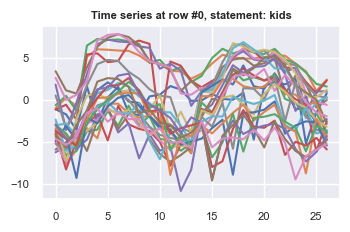

In [6]:
index = 0
statement = df['statement'][index]
plt.plot(traces[index])
plt.title(f'Time series at row #{index}, statement: {statement}')
plt.show()

/Users/paolomollica/.local/share/virtualenvs/DM2-RcLdGQSz/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/paolomollica/.local/share/virtualenvs/DM2-RcLdGQSz/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


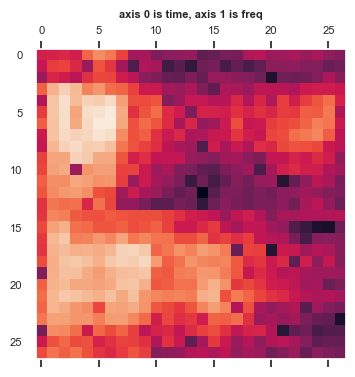

In [7]:
plt.matshow(traces[index]);plt.grid(ls="")
plt.title("axis 0 is time, axis 1 is freq");

# CNN for statement and syllables 0&2

In [8]:
sorted_indices = df['actor'].argsort()
df = df.iloc[sorted_indices].reset_index(drop=True)

traces = traces[sorted_indices]

traces

array([[[ -1.10747149,  -0.97617703,  -0.60846052, ...,  -2.96828048,
          -4.09263893,  -4.62753109],
        [ -1.71513247,   0.27687076,   0.50267377, ...,  -4.63013794,
          -5.74555753,  -5.37554136],
        [ -3.57340298,  -0.77249375,  -1.28029229, ...,  -4.52111422,
          -2.9441364 ,  -4.39698024],
        ...,
        [ -5.19948408,   3.44166846,   3.29583055, ...,  -7.35062662,
          -6.82925689,  -6.70243275],
        [ -1.51982871,   1.09495341,   1.92227177, ...,  -6.21119579,
          -5.87432141,  -5.96493419],
        [  0.80618236,   2.44447952,   1.60928003, ...,  -4.34356478,
          -4.79592291,  -5.21560531]],

       [[ -1.79580597,   5.33930592,   4.28180894, ...,  -2.1412618 ,
          -2.79822912,  -3.28907853],
        [ -2.82856474,   5.46358596,   4.79957268, ...,  -0.32784125,
          -1.25164982,  -1.94051521],
        [ -3.07690379,   5.81201582,   5.85955333, ...,  -0.20043023,
          -0.61282373,  -0.62059929],
        ...,


In [9]:
from sklearn.model_selection import train_test_split

# Sets tests to be over actor 19 (excluded)
X_test = traces[df.actor_number > 19]
y_test = df[TARGET][df.actor_number > 19].to_numpy()

# Sets the train and validation inside actors < 19
X_train, X_val, y_train, y_val = train_test_split(  traces[df.actor_number <= 19], 
                                                    df[TARGET][df.actor_number <= 19].to_numpy(), 
                                                    test_size=0.2, random_state=100)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [10]:
import optuna
from keras.layers import BatchNormalization, Activation
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, GlobalAveragePooling1D
from sklearn.metrics import accuracy_score

def build_model(input_shape, n_categories,
                n_conv=0, n_hidden=0, hidden_nodes=32,
                dropout=0.01, filters=8, kernel_size=5, **kwargs):
    
    # Stuff must be given in (timestep, spectral_coeff) format
    n_timesteps = input_shape[0]
    n_features = input_shape[1]

    model = Sequential()

    model.add(Conv1D(filters=filters,
                     kernel_size=kernel_size,
                     activation='relu',
                     input_shape=(n_timesteps, n_features),
                     name="base_conv",
                     padding="causal"
                     ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    for i in range(n_conv):
        model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu',padding="causal", name=f"extra_conv_{i}"))
        model.add(BatchNormalization())
        model.add(Activation('relu'))

        model.add(Dropout(dropout))

    model.add(GlobalAveragePooling1D())

    for i in range(n_hidden):
        model.add(Dense(hidden_nodes, activation='relu'))

    model.add(Dense(n_categories, activation='softmax'))    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Test to check the accuracy of a "belly" network
test_model = build_model((27,27), 2, 
                         n_conv=2, n_hidden=3, hidden_nodes=256)
test_model.summary()
test_model.fit(X_train, y_train,  verbose=True, epochs=8)

In [ ]:
# objective function to be minimized
def objective_fun(trial, X, y, validation_X, validation_y):

    n_conv = trial.suggest_int('n_conv', 0, 3)
    n_hidden = trial.suggest_int('n_hidden', 0, 3)
    hidden_nodes = trial.suggest_int('hidden_nodes', 8, 256)
    dropout = trial.suggest_float('dropout', 0, 0.2)
    filters = trial.suggest_int('filters', 2, 16)
    kernel_size = trial.suggest_int('kernel_size', 2, 16)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    epochs = trial.suggest_int('epochs', 5, 90)
    
    print(f"Running little bitch having n_conv={n_conv}, dropout={dropout}, hidden_nodes={hidden_nodes}")
    
    cnn = build_model(  X.shape[1:], len(np.unique(y)),
                        n_hidden=n_hidden,
                        hidden_nodes=hidden_nodes,
                        n_conv=n_conv,
                        dropout=dropout,
                        filters=filters,
                        kernel_size=kernel_size,
                       )

    cnn.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=False)
    
    y_pred = np.argmax(cnn.predict(validation_X), axis=1)

    error = accuracy_score(validation_y, y_pred)

    return error


study = optuna.create_study(direction='maximize')
trial_function = lambda trial: objective_fun(trial, 
                                             X_train, y_train,
                                             X_val, y_val)
study.optimize(trial_function, n_trials=150, n_jobs=-1, catch=ValueError)

In [ ]:
plt.plot(test_model.history.history["accuracy"], label="accuracy")
plt.legend()

In [ ]:
best_params = study.best_params
# best_params = dict(n_conv=0, n_hidden=1, hidden_nodes=248, dropout=0.752200, filters=8, kernel_size=14, batch_size=19, epochs=75)

In [ ]:
cnn = build_model((27,27), 2, **best_params)
cnn.summary()
cnn.fit( np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), 
            epochs=best_params["epochs"], 
            batch_size=best_params["batch_size"])

In [ ]:
from sklearn.metrics import f1_score, classification_report, cohen_kappa_score

# to be saved for explainability
predictions = cnn.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

predictions_path = os.path.join(TS_PREPROC_FOLDER, 'predictions.npy')
np.save(predictions_path, predictions)

print(f'Cohen k {cohen_kappa_score(y_test, y_pred)}')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## CNN and sex-emotion using syllables02 (mixed actors mode)

In [ ]:
## Note: errors may be due to actors not being ever analysed
## Check by random partitioning instead of actor < 19
y = np.array([f"{s}-{e}" for s,e in zip(df.sex, df.emotion)])
indexes = np.arange(len(df))
np.random.shuffle(indexes)
train_indxs, test_indxs, val_indxs = np.split(indexes, (len(df)*np.cumsum([0.7, 0.2])).astype(int))

X_train, X_test, X_val = traces[train_indxs], traces[test_indxs], traces[val_indxs], 
y_train, y_test, y_val = y[train_indxs], y[test_indxs], y[val_indxs]

# #### Labels ####
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(np.unique(y_train))

In [ ]:
study = optuna.create_study(direction='maximize')
trial_function = lambda trial: objective_fun(trial, 
                                             X_train, y_train,
                                             X_val, y_val)
study.optimize(trial_function, n_trials=150, n_jobs=-1, catch=ValueError)

In [ ]:
best_params = study.best_params
print(best_params)
cnn_emosex = build_model((27,27), 16, **best_params)
cnn_emosex.summary()
cnn_emosex.fit( np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), 
            epochs=best_params["epochs"], 
            batch_size=best_params["batch_size"])

In [ ]:
from sklearn.metrics import f1_score, classification_report, cohen_kappa_score, confusion_matrix

y_pred = np.argmax(cnn_emosex.predict(X_test), axis=1)

print(f'Cohen k {cohen_kappa_score(y_test, y_pred)}')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
plt.matshow(confusion_matrix(y_test, y_pred))
plt.grid(ls="")

## CNN and emotion using complete STFT

In [ ]:
file_path = os.path.join(TS_PREPROC_FOLDER, f"full_stft.npy")
full_stft = np.load(file_path, allow_pickle=True)


# Sets tests to be over actor 19 (excluded)
X_test = full_stft[df.actor_number > 19]
y_test = df["emotion"][df.actor_number > 19].to_numpy()

# Sets the train and validation inside actors < 19
X_train, X_val, y_train, y_val = train_test_split(  full_stft[df.actor_number <= 19], 
                                                    df["emotion"][df.actor_number <= 19].to_numpy(), 
                                                    test_size=0.2, random_state=100)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print(np.unique(y_train))

In [ ]:
plt.matshow(X_train[0]);
plt.grid(ls="")

In [ ]:
# objective function to be minimized
def objective_fun_bigger_model(trial, X, y, validation_X, validation_y):

    n_conv = trial.suggest_int('n_conv', 2, 5)
    n_hidden = trial.suggest_int('n_hidden', 2, 5)
    hidden_nodes = trial.suggest_int('hidden_nodes', 256, 512)
    dropout = trial.suggest_float('dropout', 0, 0.2)
    filters = trial.suggest_int('filters', 16, 32)
    kernel_size = trial.suggest_int('kernel_size', 2, 32)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    epochs = trial.suggest_int('epochs', 40, 90)
    
    print(f"Running little bitch having n_conv={n_conv}, dropout={dropout}, hidden_nodes={hidden_nodes}")
    
    cnn = build_model(  X.shape[1:], len(np.unique(y)),
                        n_hidden=n_hidden,
                        hidden_nodes=hidden_nodes,
                        n_conv=n_conv,
                        dropout=dropout,
                        filters=filters,
                        kernel_size=kernel_size,
                       )

    cnn.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=False)
    
    y_pred = np.argmax(cnn.predict(validation_X), axis=1)

    error = accuracy_score(validation_y, y_pred)

    return error


In [ ]:
# Test to check the accuracy of a "belly" network
test_model = build_model((54,54), 8, 
                         n_conv=5, n_hidden=5, hidden_nodes=512, filters=32, kernel_size=16)
test_model.summary()
test_model.fit(X_train, y_train,  verbose=True, epochs=90)

In [ ]:
study = optuna.create_study(direction='maximize')
trial_function = lambda trial: objective_fun_bigger_model(trial, 
                                             X_train, y_train,
                                             X_val, y_val)
study.optimize(trial_function, n_trials=150, n_jobs=-1, catch=ValueError)

In [ ]:
best_params = study.best_params
print(best_params)
cnn = build_model((54,54), 2, **best_params)
cnn.summary()
cnn.fit( np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), 
            epochs=best_params["epochs"], 
            batch_size=best_params["batch_size"])

In [ ]:
from sklearn.metrics import f1_score, classification_report, cohen_kappa_score

y_pred = np.argmax(cnn.predict(X_test), axis=1)

print(f'Cohen k {cohen_kappa_score(y_test, y_pred)}')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## LSTM and emotion using full STFT

In [ ]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

def build_LSTM(input_shape, n_categories,
                lstm_nodes=64,  
                n_dense=0, dense_nodes=32,
                dropout=0.01, **kwargs):
    
    # Stuff must be given in (timestep, spectral_coeff) format
    n_timesteps = input_shape[0]
    n_features = input_shape[1]

    model = Sequential()
    model.add(LSTM(lstm_nodes, 
                   input_shape=input_shape,
                   dropout=0.05,
                   recurrent_dropout=0.05,
                   name="LSTM_base"))

#     for i in range(n_lstm):
#         model.add(LSTM(lstm_nodes, name=f"extra_LSTM_{i}"))
#         model.add(Dropout(dropout))

    for i in range(n_dense):
        model.add(Dense(dense_nodes, activation='relu', name=f"extra_Dense_{i}"))
        model.add(Dropout(dropout))
    model.add(Dense(n_categories, activation='softmax')) 
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
file_path = os.path.join(TS_PREPROC_FOLDER, f"full_stft.npy")
full_stft = np.load(file_path, allow_pickle=True)
y = df.statement.to_numpy()

## Note: errors may be due to actors not being ever analysed
## Check by random partitioning instead of actor < 19

indexes = np.arange(len(df))
np.random.shuffle(indexes)
train_indxs, test_indxs, val_indxs = np.split(indexes, (len(df)*np.cumsum([0.7, 0.2])).astype(int))

X_train, X_test, X_val = full_stft[train_indxs], full_stft[test_indxs], full_stft[val_indxs], 
y_train, y_test, y_val = y[train_indxs], y[test_indxs], y[val_indxs]

# #### Labels ####
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(np.unique(y_train))

In [ ]:
# Test to check the accuracy of a "belly" network
test_model = build_LSTM((54,54), len(np.unique(y_train)), 
                        lstm_nodes=64, 
                        n_dense=2, dense_nodes=64)
test_model.summary()
test_model.fit(X_train, y_train,  verbose=True, epochs=8)

In [ ]:
# objective function to be minimized
def objective_fun_LSTM_model(trial, X, y, validation_X, validation_y):
    
    cnn = build_model(  X.shape[1:], len(np.unique(y)),
                        lstm_nodes=trial.suggest_int('lstm_nodes', 32, 128),
                        n_dense=trial.suggest_int('n_hidden', 1, 4),
                        dense_nodes=trial.suggest_int('dense_nodes', 64, 512),
                        dropout=trial.suggest_float('dropout', 0, 0.10),
                       )

    cnn.fit(X, y, 
            batch_size=trial.suggest_int('batch_size', 16, 64), 
            epochs=trial.suggest_int('epochs', 8, 60), 
            verbose=False)
    
    y_pred = np.argmax(cnn.predict(validation_X), axis=1)

    error = accuracy_score(validation_y, y_pred)

    return error

In [ ]:
study = optuna.create_study(direction='maximize')
trial_function = lambda trial: objective_fun_LSTM_model(trial, 
                                             X_train, y_train,
                                             X_val, y_val)
study.optimize(trial_function, n_trials=50, n_jobs=-1, catch=ValueError)

In [ ]:
best_params = study.best_params
print(best_params)
lstm = build_model((54,54), 8, **best_params)
lstm.summary()
lstm.fit( np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), 
            epochs=best_params["epochs"], 
            batch_size=best_params["batch_size"])

In [ ]:
y_pred = np.argmax(lstm.predict(X_test), axis=1)

print(f'Cohen k {cohen_kappa_score(y_test, y_pred)}')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

plt.matshow(confusion_matrix(y_test, y_pred))
plt.grid(ls="")

In [ ]:
indx = 800
plt.matshow(X_train[indx])
plt.title(f"{df.emotion[indx]} {df.vocal_channel[indx]}")
plt.grid(ls="")